In [ ]:
# Module - 1 (i)
# (i)	Installation of Python Libraries tools for Machine Learning Install essential ML libraries
!pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
# Module - 1 (ii)
# (ii) Data pre-processing using Python Machine Learning libraries.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Generate data
np.random.seed(42)
data = {
    "Age": np.random.randint(18, 60, 10),
    "Salary": np.random.randint(30000, 100000, 10),
    "Category": np.random.choice(["A", "B", "C"], 10),
    "Missing_Values": [np.nan if i % 3 == 0 else np.random.randint(100, 500) for i in range(10)]
}
df = pd.DataFrame(data)
print(df)
imputer = SimpleImputer(strategy="mean")
df["Missing_Values"] = imputer.fit_transform(df[["Missing_Values"]])
label_encoder = LabelEncoder()
df["Category"] = label_encoder.fit_transform(df["Category"])
scaler = StandardScaler()
df[["Age", "Salary", "Missing_Values"]] = scaler.fit_transform(df[["Age", "Salary", "Missing_Values"]])

print("Preprocessed Data:\n", df)


   Age  Salary Category  Missing_Values
0   56   74131        B             NaN
1   46   90263        B           158.0
2   32   46023        A           269.0
3   25   71090        A             NaN
4   38   97221        B           287.0
5   56   94820        B           370.0
6   36   30769        A             NaN
7   40   89735        A           289.0
8   28   92955        A           274.0
9   28   94925        C             NaN
Preprocessed Data:
         Age    Salary  Category  Missing_Values
0  1.651752 -0.186070         1        0.000000
1  0.707894  0.552859         1       -2.424480
2 -0.613508 -1.473560         0       -0.114460
3 -1.274209 -0.325363         0        0.000000
4 -0.047193  0.871571         1        0.260137
5  1.651752  0.761592         1        1.987450
6 -0.235965 -2.172271         0        0.000000
7  0.141579  0.528673         0        0.301759
8 -0.991051  0.676166         0       -0.010405
9 -0.991051  0.766402         2        0.000000


MSE: 24.29
R² Score: 0.67


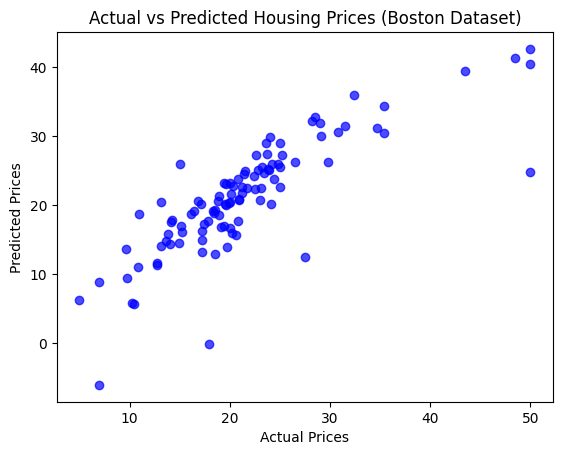

In [ ]:
# Module -2 (i)
# (i)	Design a model to predict the housing price from Boston Dataset using Multivariate Linear Regression.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, linear_model, metrics

# Load Boston Housing Dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
df = pd.DataFrame(X, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])
df["PRICE"] = y


X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(columns=["PRICE"]), df["PRICE"], test_size=0.2, random_state=42)


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {metrics.r2_score(y_test, y_pred):.2f}")

# Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices (Boston Dataset)")
plt.show()


Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.50      0.78      0.61         9
           1       0.67      0.36      0.47        11

    accuracy                           0.55        20
   macro avg       0.58      0.57      0.54        20
weighted avg       0.59      0.55      0.53        20



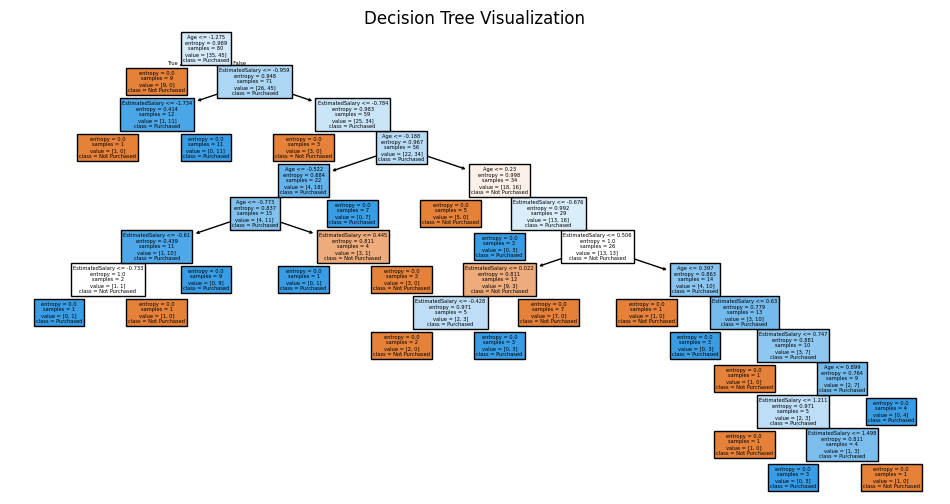

In [ ]:
# Module -2 (ii)
# Decision Tree to classify whether the given user will purchase a product or not from a social networking dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, tree, metrics

# Generate Social Network Data
np.random.seed(42)
data = {
    "Age": np.random.randint(18, 60, 100),
    "EstimatedSalary": np.random.randint(20000, 100000, 100),
    "Purchased": np.random.choice([0, 1], 100)  # 0 = No, 1 = Yes
}
df = pd.DataFrame(data)

X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(metrics.classification_report(y_test, y_pred))

# Visualize Decision Tree
plt.figure(figsize=(12, 6))
tree.plot_tree(clf, feature_names=["Age", "EstimatedSalary"], class_names=["Not Purchased", "Purchased"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=31
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=44096

  warn(warning_msg)


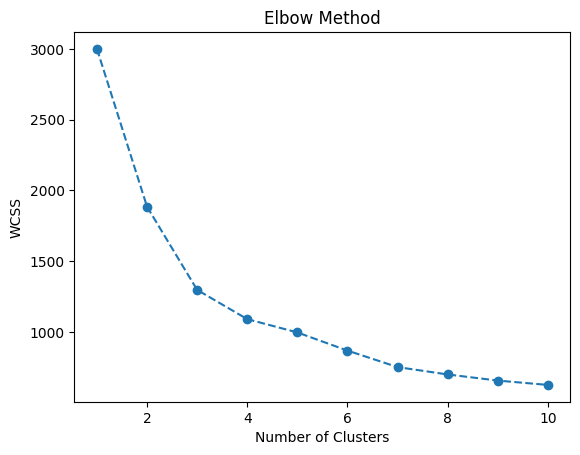

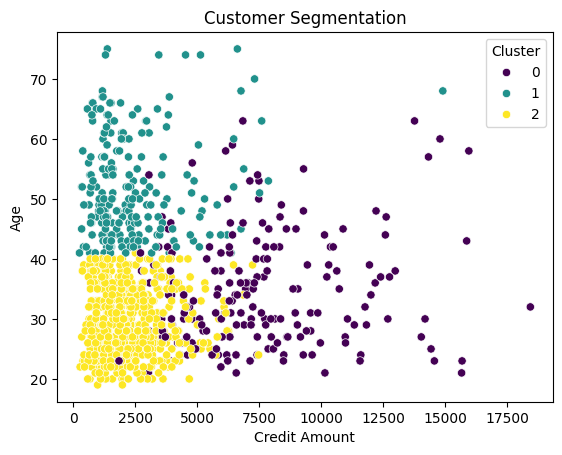

In [ ]:
# Module 3 (i)
# (i)	Segment a customer dataset based on the buying behaviour of customers using K-means clustering.

# Import necessary libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans; from sklearn.preprocessing import StandardScaler

# Fetch dataset
df = fetch_openml(name="credit-g", as_frame=True).frame


df = df[["duration", "credit_amount", "age"]].dropna()
df_scaled = StandardScaler().fit_transform(df)

# Elbow Method to find optimal K
wcss = [KMeans(n_clusters=i, init="k-means++", random_state=42).fit(df_scaled).inertia_ for i in range(1, 11)]
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()



df["Cluster"] = KMeans(n_clusters=3, init="k-means++", random_state=42).fit_predict(df_scaled)

sns.scatterplot(x=df["credit_amount"], y=df["age"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Credit Amount")
plt.ylabel("Age")
plt.title("Customer Segmentation")
plt.show()


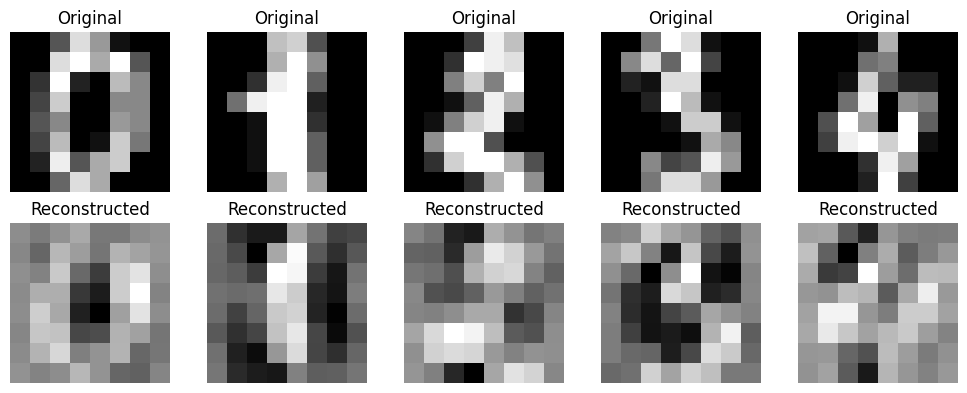

In [ ]:
# Module -3 (ii)
# (ii) Dimensionality reduction of any image dataset using Principal Component Analysis.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
digits = datasets.load_digits()
X, y = digits.images, digits.target
X_flattened = X.reshape(X.shape[0], -1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


pca_reconstruct = PCA(n_components=20)
X_reduced = pca_reconstruct.fit_transform(X_scaled)
X_reconstructed = pca_reconstruct.inverse_transform(X_reduced)

# Show Original vs. Reconstructed Images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    if i < 5:
        ax.imshow(X[i], cmap='gray')
        ax.set_title("Original")
    else:
        ax.imshow(X_reconstructed[i-5].reshape(8, 8), cmap='gray')
        ax.set_title("Reconstructed")
    ax.axis('off')

plt.tight_layout()


plt.show()


In [ ]:
pip install tensorflow

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8819 - loss: 0.3980 - val_accuracy: 0.9599 - val_loss: 0.1278
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9692 - loss: 0.1027 - val_accuracy: 0.9660 - val_loss: 0.1103
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9785 - loss: 0.0688 - val_accuracy: 0.9737 - val_loss: 0.0863
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9848 - loss: 0.0485 - val_accuracy: 0.9735 - val_loss: 0.0883
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9877 - loss: 0.0377 - val_accuracy: 0.9756 - val_loss: 0.0795
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9906 - loss: 0.0306 - val_accuracy: 0.9775 - val_loss: 0.0821
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9793 - val_loss: 0.0756
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9937 - loss: 0.020

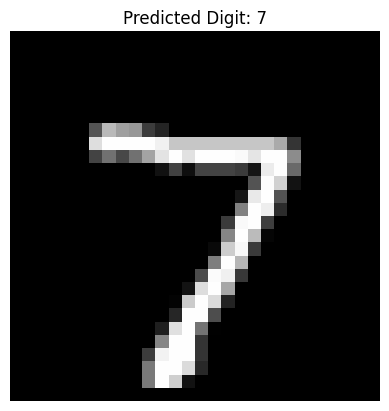

In [ ]:
# Module 4 (i)
# (i)	Recognition of MNIST handwritten digits using Artificial Neural Network.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 3: Build ANN Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Step 7: Function to visualize prediction
def predict_and_visualize(index):
    img = x_test[index]
    pred = np.argmax(model.predict(img.reshape(1, 28, 28)), axis=1)[0]

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {pred}")
    plt.axis("off")
    plt.show()

predict_and_visualize(0)
